In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import pickle
import obspy
from scipy.signal import find_peaks
import os
import pandas as pd

In [2]:
combined = pd.read_csv('/home/earthquakes1/homes/Rebecca/phd/stf/data/combined.csv')

In [284]:
number_of_peaks_opt = []
magnitudes_opt = []
number_of_peaks_moy = []
magnitudes_moy = []
names_of_peaks = []
all_diff_moment_rate = []
all_time_opt = []
all_moment_rate = []
for scardec_name in os.listdir('/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec'):

    db = combined[combined['scardec_name']==scardec_name]

    time_opt = []
    momentrate_opt = []

    time_moy = []
    momentrate_moy = []

    event = os.listdir(f'/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec/{scardec_name}')
    starts = [n for n, l in enumerate(event) if l.startswith('fctopt')]
    with open(f'/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec/{scardec_name}/{event[starts[0]]}') as f:
        lines = f.read().splitlines()

    lines = lines[2:]
    for line in lines:
        split = line.split(' ')
        split = [s for s in split if s not in ['', ' ', '\n']]
        if split[1] != 0:
            time_opt.append(float(split[0]))
            momentrate_opt.append(float(split[1]))

    momentrate_opt = np.array(momentrate_opt)

    not_zero = np.where(momentrate_opt > 0)[0]

    start = min(not_zero)
    end = max(not_zero)
    #duration = time_opt[end] - time_opt[start]
    #durations.append(duration)

    momentrate_opt_diff = np.diff(momentrate_opt[start:end])
    all_moment_rate.append(momentrate_opt[start:end])
    all_diff_moment_rate.append(momentrate_opt_diff)
    all_time_opt.append(time_opt[start:end])
    names_of_peaks.append(scardec_name)
    magnitudes_opt.append(db.scardec_magnitude.values[0])




In [283]:
momentrate_opt_diff

array([ 5.36661790e+16,  6.73098603e+16,  7.18462640e+16,  7.16470810e+16,
        7.16039770e+16,  7.60091360e+16,  8.70647590e+16,  1.03405186e+17,
        1.19406001e+17,  1.25942941e+17,  1.12924858e+17,  7.30659200e+16,
        5.76783000e+15, -8.04059800e+16, -1.67786918e+17, -2.32638037e+17,
       -2.50544787e+17])

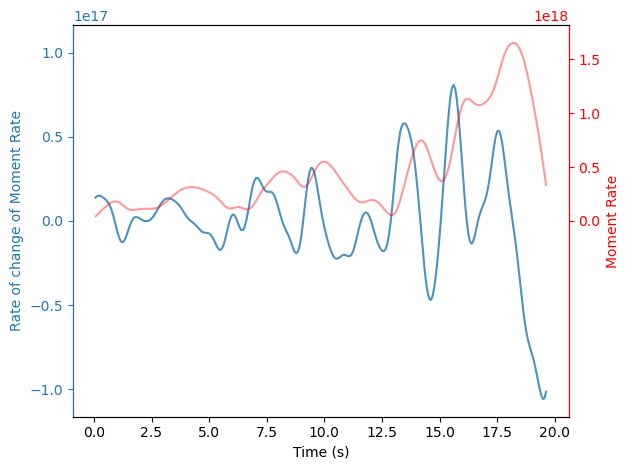

In [ ]:
fig, ax = plt.subplots()

times, diff, rate = [], [], []

for t, m, n in zip(all_time_opt[0][:-1], all_diff_moment_rate[0], all_moment_rate[0]):
    if t != 0:
        times.append(t)
        diff.append(m)
        rate.append(n)

ax.plot(times, diff, alpha = 0.8)
ax.set_ylabel('Rate of change of Moment Rate', color='tab:blue')
ax2.spines['left'].set_color('tab:blue')
ax.set_xlabel('Time (s)')


ax2 = ax.twinx()
ax2.plot(times, rate, color='r', alpha = 0.4)



ax.tick_params(axis='y', colors='tab:blue')
ax2.tick_params(axis='y', colors='red')

ax2.spines['left'].set_color('tab:blue')
ax2.spines['right'].set_color('red')

ax2.set_ylabel('Moment Rate', color='r')

ax.set_ylim(-1.1*max(abs(all_diff_moment_rate[0])), 1.1*max(abs(all_diff_moment_rate[0])))
ax2.set_ylim(-1.1*max(all_moment_rate[0]), 1.1*max(all_moment_rate[0]))

limits = ax2.get_ylim()

ticks = ax2.get_yticks()
ax2.set_yticks(ticks[int(len(ticks)/2):])
ax2.set_ylim(limits)

plt.tight_layout()
plt.show()

In [ ]:
for i, name in enumerate(names_of_peaks):
    fig, axs = plt.subplots(2, 1, figsize=(5, 5))  # create figure and axis
    #fig.subplots_adjust(top=0.8)
    ax1 = axs[0]  # first subplot
    ax2 = axs[1]  # second subplot

    ax2.plot(all_time_opt[i][1:], all_diff_moment_rate[i])
    ax1.plot(all_time_opt[i], all_moment_rate[i], color='r', alpha = 0.4)

    ax2.spines[["left", "bottom"]].set_position(("data", 0))
    # Hide the top and right spines.
    ax2.spines[["top", "right"]].set_visible(False)
    ax2.set_xticklabels([])

    ax1.spines[["left", "bottom"]].set_position(("data", 0))
    # Hide the top and right spines.
    ax1.spines[["top", "right"]].set_visible(False)

    ax2.set_ylabel(r'$\ddot{M}$', color='tab:blue')
    ax1.set_ylabel(r'$\dot{M}$', color='r')

    ax2.spines['left'].set_color('tab:blue')        # setting up Y-axis tick color to red
    ax1.spines['left'].set_color('red')
    ax2.tick_params(axis='y', colors='tab:blue')
    ax1.tick_params(axis='y', colors='red')

    plt.xlabel('Time (s)')

    fig.suptitle(name)

    #plt.ylabel('Moment Rate', color='r')
    plt.tight_layout()
    plt.savefig(f'/home/earthquakes1/homes/Rebecca/phd/stf/figures/rate_of_moment_rate/{name}.png')

    plt.close()


In [ ]:
for i, name in enumerate(names_of_peaks):
    fig, ax = plt.subplots()

    ax.plot(all_time_opt[0][:-1], all_diff_moment_rate[0])
    ax.set_ylabel('Rate of change of Moment Rate', color='tab:blue')
    ax2.spines['left'].set_color('tab:blue')
    ax.set_xlabel('Time (s)')


    ax2 = ax.twinx()
    ax2.plot(all_time_opt[0], all_moment_rate[0], color='r', alpha = 0.4)



    ax.tick_params(axis='y', colors='tab:blue')
    ax2.tick_params(axis='y', colors='red')

    ax2.spines['left'].set_color('tab:blue')
    ax2.spines['right'].set_color('red')

    ax2.set_ylabel('Moment Rate', color='r')

    ax.set_ylim(-1.1*max(abs(all_diff_moment_rate[0])), 1.1*max(abs(all_diff_moment_rate[0])))
    ax2.set_ylim(-1.1*max(all_moment_rate[0]), 1.1*max(all_moment_rate[0]))

    limits = ax2.get_ylim()

    ticks = ax2.get_yticks()
    ax2.set_yticks(ticks[int(len(ticks)/2):])
    ax2.set_ylim(limits)

    plt.tight_layout()
    plt.savefig(f'/home/earthquakes1/homes/Rebecca/phd/stf/figures/rate_of_moment_rate/{name}.png')

    plt.close()

Spearman correlation coefficient: 0.6355825401182283
P-value: 0.0
0.7418051008638183 12.1764162363728


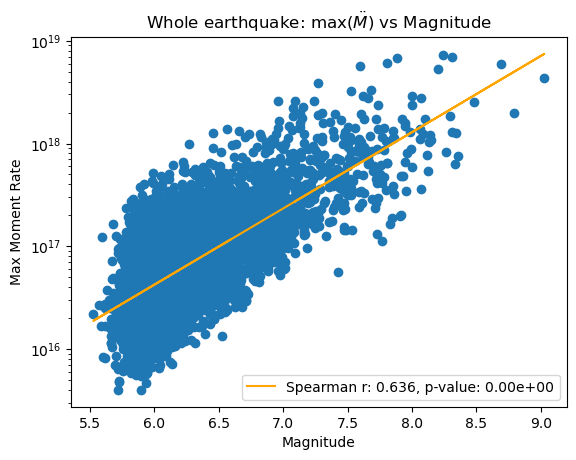

In [ ]:
max_rate_of_rate = []
mags = []
count = 0
for i in range(0, len(all_diff_moment_rate)):
    # print(i)
    eq, mag = all_diff_moment_rate[i], magnitudes_opt[i]
    a = max(abs(np.array(eq)))
    if a != 0:
        max_rate_of_rate.append(a)
        mags.append(mag)

plt.scatter(mags, max_rate_of_rate)

plt.xlabel('Magnitude')
plt.ylabel('Max Moment Rate')

plt.yscale('log')

max_rate_of_rate = np.array(max_rate_of_rate)
max_rate_of_rate[max_rate_of_rate == 0] = np.nan

plt.title('Whole earthquake: $\max(\ddot{M})$ vs Magnitude')
spearman_corr, p_value = stats.spearmanr(mags, max_rate_of_rate)

print(f"Spearman correlation coefficient: {spearman_corr}")
print(f"P-value: {p_value}")

# idx = np.isfinite(magnitudes_opt) & np.isfinite(max_rate_of_rate) &
# magnitudes_opt = np.array(magnitudes_opt)[idx]
# max_rate_of_rate = np.array(max_rate_of_rate)[idx]

m, b = np.polyfit(mags, np.log10(max_rate_of_rate), 1)
print(m, b)
plt.plot(magnitudes_opt, 10**(m * np.array(magnitudes_opt) + b), color='orange', label = f'Spearman r: {spearman_corr:.3f}, p-value: {p_value:.2e}')
plt.legend()
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/rate_of_moment_rate/max_rate_of_rate_whole.png')

Spearman correlation coefficient: 0.5628229353216314
P-value: 0.0
0.7035127288786026 12.115761316051215


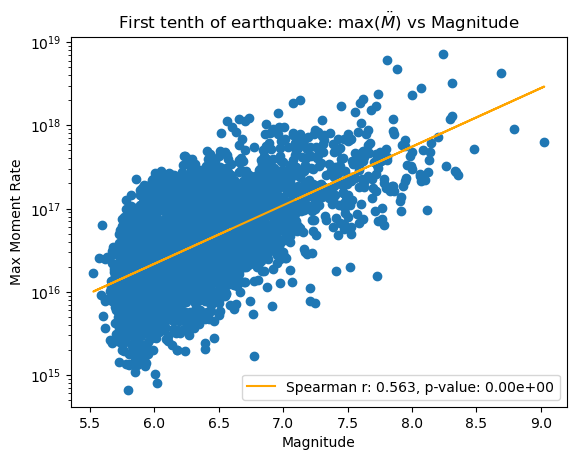

In [ ]:
max_rate_of_rate = []
mags = []
count = 0
for eq, mag in zip(all_diff_moment_rate, magnitudes_opt):
    a = max(abs(np.array(eq[:int(len(eq)/10)])))
    if a != 0:
        max_rate_of_rate.append(a)
        mags.append(mag)

plt.scatter(mags, max_rate_of_rate)

plt.xlabel('Magnitude')
plt.ylabel('Max Moment Rate')

plt.yscale('log')

max_rate_of_rate = np.array(max_rate_of_rate)
max_rate_of_rate[max_rate_of_rate == 0] = np.nan

plt.title('First tenth of earthquake: $\max(\ddot{M})$ vs Magnitude')
spearman_corr, p_value = stats.spearmanr(mags, max_rate_of_rate)

print(f"Spearman correlation coefficient: {spearman_corr}")
print(f"P-value: {p_value}")

# idx = np.isfinite(magnitudes_opt) & np.isfinite(max_rate_of_rate) &
# magnitudes_opt = np.array(magnitudes_opt)[idx]
# max_rate_of_rate = np.array(max_rate_of_rate)[idx]

m, b = np.polyfit(mags, np.log10(max_rate_of_rate), 1)
print(m, b)
plt.plot(magnitudes_opt, 10**(m * np.array(magnitudes_opt) + b), color='orange', label = f'Spearman r: {spearman_corr:.3f}, p-value: {p_value:.2e}')
plt.legend()
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/rate_of_moment_rate/max_rate_of_rate_tenth.png')

Spearman correlation coefficient: 0.6127589076842722
P-value: 0.0
0.7263593821913871 12.158172186850251


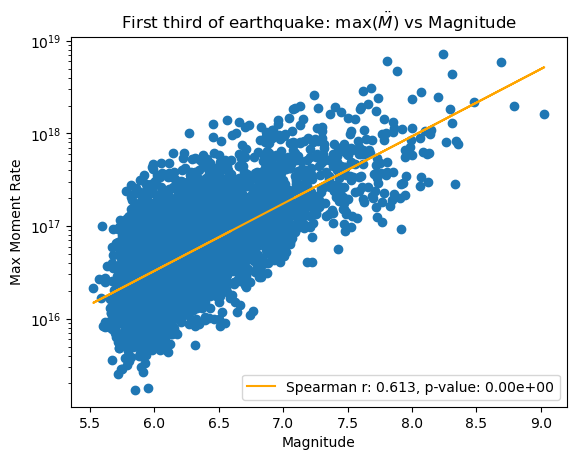

In [ ]:
max_rate_of_rate = []
mags = []
count = 0
for eq, mag in zip(all_diff_moment_rate, magnitudes_opt):
    a = max(abs(np.array(eq[:int(len(eq)/3)])))
    if a != 0:
        max_rate_of_rate.append(a)
        mags.append(mag)

plt.scatter(mags, max_rate_of_rate)

plt.xlabel('Magnitude')
plt.ylabel('Max Moment Rate')

plt.yscale('log')

max_rate_of_rate = np.array(max_rate_of_rate)
max_rate_of_rate[max_rate_of_rate == 0] = np.nan

plt.title('First third of earthquake: $\max(\ddot{M})$ vs Magnitude')
spearman_corr, p_value = stats.spearmanr(mags, max_rate_of_rate)

print(f"Spearman correlation coefficient: {spearman_corr}")
print(f"P-value: {p_value}")

# idx = np.isfinite(magnitudes_opt) & np.isfinite(max_rate_of_rate) &
# magnitudes_opt = np.array(magnitudes_opt)[idx]
# max_rate_of_rate = np.array(max_rate_of_rate)[idx]

m, b = np.polyfit(mags, np.log10(max_rate_of_rate), 1)
print(m, b)
plt.plot(magnitudes_opt, 10**(m * np.array(magnitudes_opt) + b), color='orange', label = f'Spearman r: {spearman_corr:.3f}, p-value: {p_value:.2e}')
plt.legend()
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/rate_of_moment_rate/max_rate_of_rate_third.png')

Spearman correlation coefficient: 0.5953163556444466
P-value: 0.0
0.7206492890042477 12.149692619659142


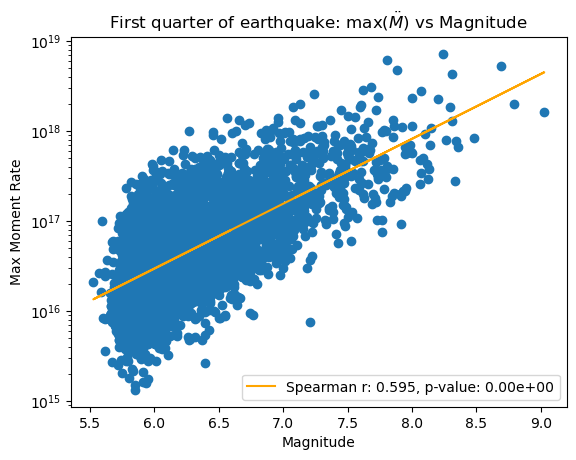

In [ ]:
max_rate_of_rate = []
mags = []
count = 0
for eq, mag in zip(all_diff_moment_rate, magnitudes_opt):
    a = max(abs(np.array(eq[:int(len(eq)/4)])))
    if a != 0:
        max_rate_of_rate.append(a)
        mags.append(mag)

plt.scatter(mags, max_rate_of_rate)

plt.xlabel('Magnitude')
plt.ylabel('Max Moment Rate')

plt.yscale('log')

max_rate_of_rate = np.array(max_rate_of_rate)
max_rate_of_rate[max_rate_of_rate == 0] = np.nan

plt.title('First quarter of earthquake: $\max(\ddot{M})$ vs Magnitude')
spearman_corr, p_value = stats.spearmanr(mags, max_rate_of_rate)

print(f"Spearman correlation coefficient: {spearman_corr}")
print(f"P-value: {p_value}")

# idx = np.isfinite(magnitudes_opt) & np.isfinite(max_rate_of_rate) &
# magnitudes_opt = np.array(magnitudes_opt)[idx]
# max_rate_of_rate = np.array(max_rate_of_rate)[idx]

m, b = np.polyfit(mags, np.log10(max_rate_of_rate), 1)
print(m, b)
plt.plot(magnitudes_opt, 10**(m * np.array(magnitudes_opt) + b), color='orange', label = f'Spearman r: {spearman_corr:.3f}, p-value: {p_value:.2e}')
plt.legend()
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/rate_of_moment_rate/max_rate_of_rate_quarter.png')

Spearman correlation coefficient: 0.631579033757445
P-value: 0.0
0.7398712480761294 12.122302439397123


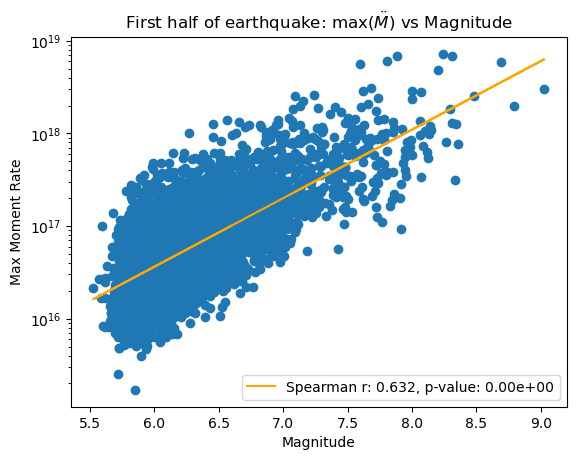

In [ ]:
max_rate_of_rate = []
mags = []
count = 0
for eq, mag in zip(all_diff_moment_rate, magnitudes_opt):
    a = max(abs(np.array(eq[:int(len(eq)/2)])))
    if a != 0:
        max_rate_of_rate.append(a)
        mags.append(mag)

plt.scatter(mags, max_rate_of_rate)

plt.xlabel('Magnitude')
plt.ylabel('Max Moment Rate')

plt.yscale('log')

max_rate_of_rate = np.array(max_rate_of_rate)
max_rate_of_rate[max_rate_of_rate == 0] = np.nan

plt.title('First half of earthquake: $\max(\ddot{M})$ vs Magnitude')
spearman_corr, p_value = stats.spearmanr(mags, max_rate_of_rate)

print(f"Spearman correlation coefficient: {spearman_corr}")
print(f"P-value: {p_value}")

# idx = np.isfinite(magnitudes_opt) & np.isfinite(max_rate_of_rate) &
# magnitudes_opt = np.array(magnitudes_opt)[idx]
# max_rate_of_rate = np.array(max_rate_of_rate)[idx]

m, b = np.polyfit(mags, np.log10(max_rate_of_rate), 1)
print(m, b)
plt.plot(magnitudes_opt, 10**(m * np.array(magnitudes_opt) + b), color='orange', label = f'Spearman r: {spearman_corr:.3f}, p-value: {p_value:.2e}')
plt.legend()
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/rate_of_moment_rate/max_rate_of_rate_half.png')

Spearman correlation coefficient: 0.6216734698770409
P-value: 0.0
0.7605857201178553 11.949746164318519


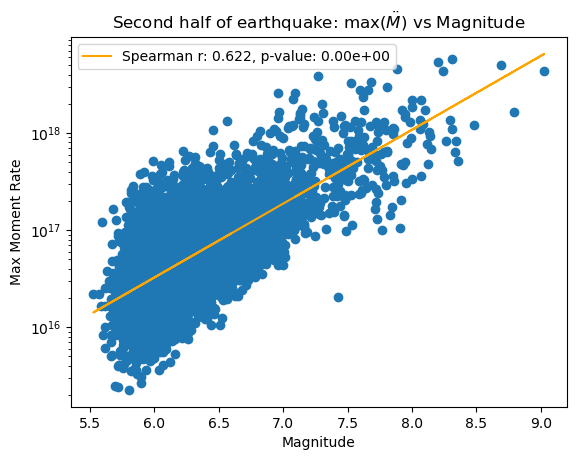

In [ ]:
max_rate_of_rate = []
mags = []
count = 0
for eq, mag in zip(all_diff_moment_rate, magnitudes_opt):
    a = max(abs(np.array(eq[int(len(eq)/2):])))
    if a != 0:
        max_rate_of_rate.append(a)
        mags.append(mag)

plt.scatter(mags, max_rate_of_rate)

plt.xlabel('Magnitude')
plt.ylabel('Max Moment Rate')

plt.yscale('log')

max_rate_of_rate = np.array(max_rate_of_rate)
max_rate_of_rate[max_rate_of_rate == 0] = np.nan

plt.title('Second half of earthquake: $\max(\ddot{M})$ vs Magnitude')
spearman_corr, p_value = stats.spearmanr(mags, max_rate_of_rate)

print(f"Spearman correlation coefficient: {spearman_corr}")
print(f"P-value: {p_value}")

# idx = np.isfinite(magnitudes_opt) & np.isfinite(max_rate_of_rate) &
# magnitudes_opt = np.array(magnitudes_opt)[idx]
# max_rate_of_rate = np.array(max_rate_of_rate)[idx]

m, b = np.polyfit(mags, np.log10(max_rate_of_rate), 1)
print(m, b)
plt.plot(magnitudes_opt, 10**(m * np.array(magnitudes_opt) + b), color='orange', label = f'Spearman r: {spearman_corr:.3f}, p-value: {p_value:.2e}')
plt.legend()
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/rate_of_moment_rate/max_rate_of_rate_second_half.png')

Spearman correlation coefficient: 0.8329061688120563
P-value: 0.0
1.1049186495980983 10.398458006744525


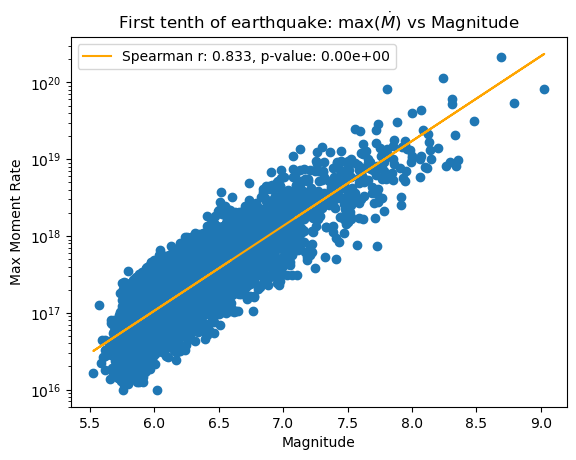

In [ ]:
max_rate_of_rate = []
mags = []
count = 0
for eq, mag in zip(all_moment_rate, magnitudes_opt):
    a = max(abs(np.array(eq[:int(len(eq)/10)])))
    if a > 0:
        max_rate_of_rate.append(a)
        mags.append(mag)

plt.scatter(mags, max_rate_of_rate)

plt.xlabel('Magnitude')
plt.ylabel('Max Moment Rate')

plt.yscale('log')

max_rate_of_rate = np.array(max_rate_of_rate)
max_rate_of_rate[max_rate_of_rate == 0] = np.nan

plt.title('First tenth of earthquake: $\max(\dot{M})$ vs Magnitude')
spearman_corr, p_value = stats.spearmanr(mags, max_rate_of_rate)

print(f"Spearman correlation coefficient: {spearman_corr}")
print(f"P-value: {p_value}")

# idx = np.isfinite(magnitudes_opt) & np.isfinite(max_rate_of_rate) &
# magnitudes_opt = np.array(magnitudes_opt)[idx]
# max_rate_of_rate = np.array(max_rate_of_rate)[idx]

m, b = np.polyfit(mags, np.log10(max_rate_of_rate), 1)
print(m, b)
plt.plot(magnitudes_opt, 10**(m * np.array(magnitudes_opt) + b), color='orange', label = f'Spearman r: {spearman_corr:.3f}, p-value: {p_value:.2e}')
plt.legend()
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/rate_of_moment_rate/max_rate_tenth.png')

Spearman correlation coefficient: 0.8285313869976534
P-value: 0.0
1.0409119103801163 11.313349365355574


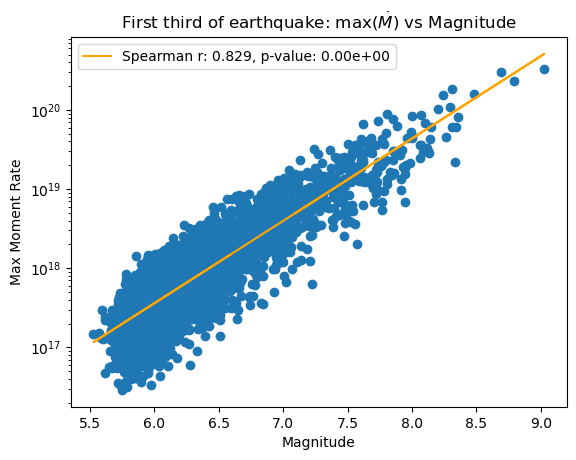

In [ ]:
max_rate_of_rate = []
mags = []
count = 0
for eq, mag in zip(all_moment_rate, magnitudes_opt):
    a = max(abs(np.array(eq[:int(len(eq)/3)])))
    if a > 0:
        max_rate_of_rate.append(a)
        mags.append(mag)

plt.scatter(mags, max_rate_of_rate)

plt.xlabel('Magnitude')
plt.ylabel('Max Moment Rate')

plt.yscale('log')

max_rate_of_rate = np.array(max_rate_of_rate)
max_rate_of_rate[max_rate_of_rate == 0] = np.nan

plt.title('First third of earthquake: $\max(\dot{M})$ vs Magnitude')
spearman_corr, p_value = stats.spearmanr(mags, max_rate_of_rate)

print(f"Spearman correlation coefficient: {spearman_corr}")
print(f"P-value: {p_value}")

# idx = np.isfinite(magnitudes_opt) & np.isfinite(max_rate_of_rate) &
# magnitudes_opt = np.array(magnitudes_opt)[idx]
# max_rate_of_rate = np.array(max_rate_of_rate)[idx]

m, b = np.polyfit(mags, np.log10(max_rate_of_rate), 1)
print(m, b)
plt.plot(magnitudes_opt, 10**(m * np.array(magnitudes_opt) + b), color='orange', label = f'Spearman r: {spearman_corr:.3f}, p-value: {p_value:.2e}')
plt.legend()
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/rate_of_moment_rate/max_rate_third.png')

Spearman correlation coefficient: 0.8175229310744475
P-value: 0.0
1.0421227073789576 11.196218090620699


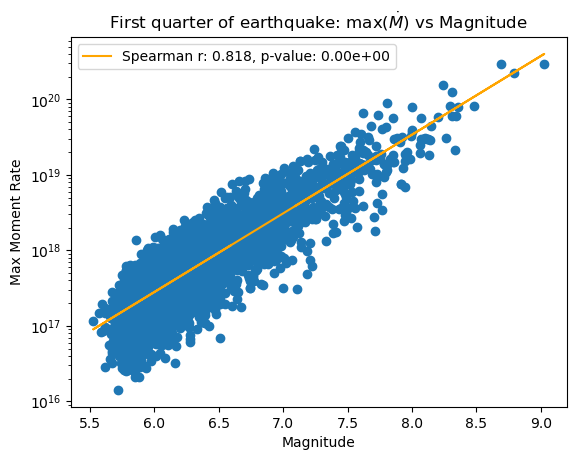

In [ ]:
max_rate_of_rate = []
mags = []
count = 0
for eq, mag in zip(all_moment_rate, magnitudes_opt):
    a = max(abs(np.array(eq[:int(len(eq)/4)])))
    if a > 0:
        max_rate_of_rate.append(a)
        mags.append(mag)

plt.scatter(mags, max_rate_of_rate)

plt.xlabel('Magnitude')
plt.ylabel('Max Moment Rate')

plt.yscale('log')

max_rate_of_rate = np.array(max_rate_of_rate)
max_rate_of_rate[max_rate_of_rate == 0] = np.nan

plt.title('First quarter of earthquake: $\max(\dot{M})$ vs Magnitude')
spearman_corr, p_value = stats.spearmanr(mags, max_rate_of_rate)

print(f"Spearman correlation coefficient: {spearman_corr}")
print(f"P-value: {p_value}")

# idx = np.isfinite(magnitudes_opt) & np.isfinite(max_rate_of_rate) &
# magnitudes_opt = np.array(magnitudes_opt)[idx]
# max_rate_of_rate = np.array(max_rate_of_rate)[idx]

m, b = np.polyfit(mags, np.log10(max_rate_of_rate), 1)
print(m, b)
plt.plot(magnitudes_opt, 10**(m * np.array(magnitudes_opt) + b), color='orange', label = f'Spearman r: {spearman_corr:.3f}, p-value: {p_value:.2e}')
plt.legend()
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/rate_of_moment_rate/max_rate_quarter.png')

Spearman correlation coefficient: 0.8479403873048986
P-value: 0.0
1.045977459485126 11.394801265913424


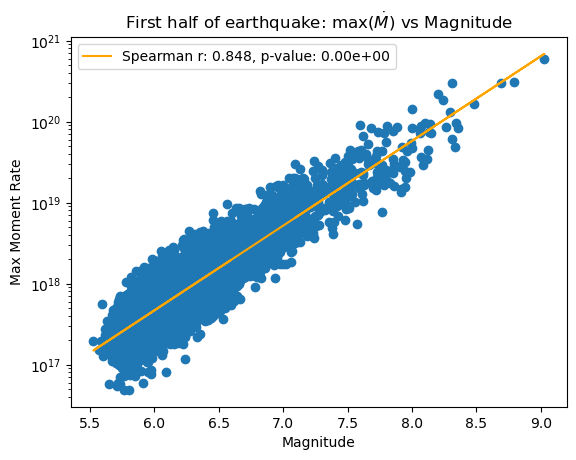

In [ ]:
max_rate_of_rate = []
mags = []
count = 0
for eq, mag in zip(all_moment_rate, magnitudes_opt):
    a = max(abs(np.array(eq[:int(len(eq)/2)])))
    if a > 0:
        max_rate_of_rate.append(a)
        mags.append(mag)

plt.scatter(mags, max_rate_of_rate)

plt.xlabel('Magnitude')
plt.ylabel('Max Moment Rate')

plt.yscale('log')

max_rate_of_rate = np.array(max_rate_of_rate)
max_rate_of_rate[max_rate_of_rate == 0] = np.nan

plt.title('First half of earthquake: $\max(\dot{M})$ vs Magnitude')
spearman_corr, p_value = stats.spearmanr(mags, max_rate_of_rate)

print(f"Spearman correlation coefficient: {spearman_corr}")
print(f"P-value: {p_value}")

# idx = np.isfinite(magnitudes_opt) & np.isfinite(max_rate_of_rate) &
# magnitudes_opt = np.array(magnitudes_opt)[idx]
# max_rate_of_rate = np.array(max_rate_of_rate)[idx]

m, b = np.polyfit(mags, np.log10(max_rate_of_rate), 1)
print(m, b)
plt.plot(magnitudes_opt, 10**(m * np.array(magnitudes_opt) + b), color='orange', label = f'Spearman r: {spearman_corr:.3f}, p-value: {p_value:.2e}')
plt.legend()
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/rate_of_moment_rate/max_rate_half.png')

Spearman correlation coefficient: 0.8058273429508902
P-value: 0.0
1.0605124192710458 11.256576094130631


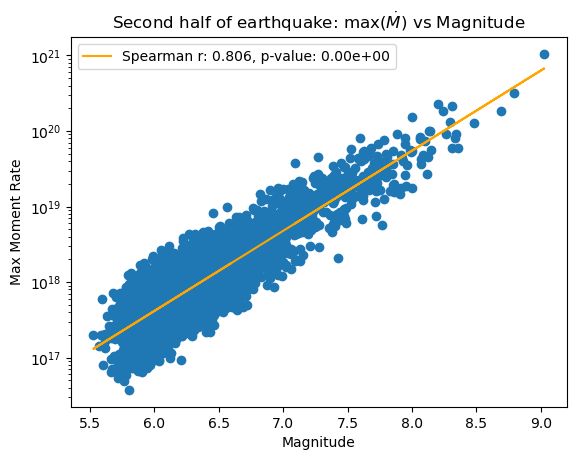

In [ ]:
max_rate_of_rate = []
mags = []
count = 0
for eq, mag in zip(all_moment_rate, magnitudes_opt):
    a = max(abs(np.array(eq[int(len(eq)/2):])))
    if a > 0:
        max_rate_of_rate.append(a)
        mags.append(mag)

plt.scatter(mags, max_rate_of_rate)

plt.xlabel('Magnitude')
plt.ylabel('Max Moment Rate')

plt.yscale('log')

max_rate_of_rate = np.array(max_rate_of_rate)
max_rate_of_rate[max_rate_of_rate == 0] = np.nan

plt.title('Second half of earthquake: $\max(\dot{M})$ vs Magnitude')
spearman_corr, p_value = stats.spearmanr(mags, max_rate_of_rate)

print(f"Spearman correlation coefficient: {spearman_corr}")
print(f"P-value: {p_value}")

# idx = np.isfinite(magnitudes_opt) & np.isfinite(max_rate_of_rate) &
# magnitudes_opt = np.array(magnitudes_opt)[idx]
# max_rate_of_rate = np.array(max_rate_of_rate)[idx]

m, b = np.polyfit(mags, np.log10(max_rate_of_rate), 1)
print(m, b)
plt.plot(magnitudes_opt, 10**(m * np.array(magnitudes_opt) + b), color='orange', label = f'Spearman r: {spearman_corr:.3f}, p-value: {p_value:.2e}')
plt.legend()
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/rate_of_moment_rate/max_rate_second_half.png')

Spearman correlation coefficient: 0.8586720636137963
P-value: 0.0


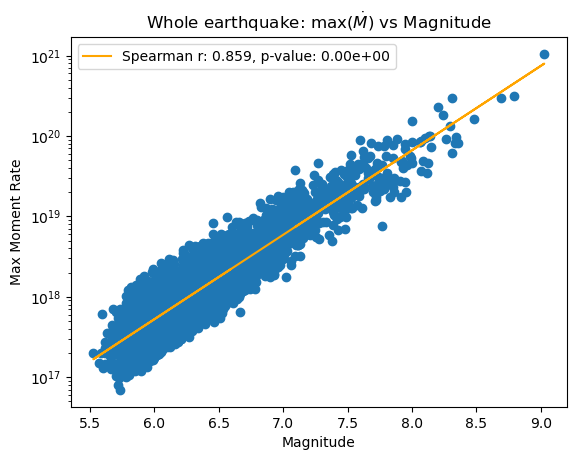

In [296]:
max_rate_of_rate = []
mags = []
count = 0
for eq, mag in zip(all_moment_rate, magnitudes_opt):
    a = max(abs(np.array(eq)))
    if a > 0:
        max_rate_of_rate.append(a)
        mags.append(mag)
plt.scatter(magnitudes_opt, max_rate_of_rate)

plt.xlabel('Magnitude')
plt.ylabel('Max Moment Rate')

plt.yscale('log')
plt.title('Whole earthquake: $\max(\dot{M})$ vs Magnitude')

spearman_corr, p_value = stats.spearmanr(magnitudes_opt, max_rate_of_rate)

print(f"Spearman correlation coefficient: {spearman_corr}")
print(f"P-value: {p_value}")


m, b = np.polyfit(magnitudes_opt, np.log10(np.ma.masked_equal(max_rate_of_rate,0)), 1)
plt.plot(magnitudes_opt, 10**(m * np.array(magnitudes_opt) + b), color='orange', label = f'Spearman r: {spearman_corr:.3f}, p-value: {p_value:.2e}')
plt.legend()
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/rate_of_moment_rate/max_rate_whole.png')